## Decision tree wlassifier with Scikit-learn

In [1]:
import pandas as pd

### Load dataset

In [2]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [3]:
len(train_df), len(test_df)

(891, 418)

In [4]:
train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

In [5]:
all_df =train_df.append(test_df).set_index('PassengerId')
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 전처리

In [6]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [8]:
all_df.groupby("Pclass")["Age"].transform("mean")

PassengerId
1       24.816367
2       39.159930
3       24.816367
4       39.159930
5       24.816367
          ...    
1305    24.816367
1306    39.159930
1307    24.816367
1308    24.816367
1309    24.816367
Name: Age, Length: 1309, dtype: float64

In [9]:
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
all_df["Name"]

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [12]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [13]:
all_df["Name"].unique().tolist()[-10:]

['Riordan, Miss. Johanna Hannah""',
 'Peacock, Miss. Treasteall',
 'Naughton, Miss. Hannah',
 'Minahan, Mrs. William Edward (Lillian E Thorpe)',
 'Henriksson, Miss. Jenny Lovisa',
 'Spector, Mr. Woolf',
 'Oliva y Ocana, Dona. Fermina',
 'Saether, Mr. Simon Sivertsen',
 'Ware, Mr. Frederick',
 'Peter, Master. Michael J']

In [14]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [15]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [16]:
all_df[all_df["social_status"] == "0"]["Name"]

PassengerId
31                               Uruchurtu, Don. Manuel E
370                         Aubart, Mme. Leontine Pauline
450                        Peuchen, Major. Arthur Godfrey
537                     Butt, Major. Archibald Willingham
642                                  Sagesser, Mlle. Emma
746                          Crosby, Capt. Edward Gifford
760     Rothes, the Countess. of (Lucy Noel Martha Dye...
823                       Reuchlin, Jonkheer. John George
1306                         Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object

In [17]:
all_df.iloc[train_id-1].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
cabin_count        0
social_status      0
dtype: int64

In [18]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


## Drop Embarked

In [19]:
all_df =all_df.drop([62,830])

In [20]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

In [21]:
import numpy as np 

train_id = np.delete(train_id, [62-1,830-1])

In [22]:
all_df.iloc[:len(train_id)].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
cabin_count        0
social_status      0
dtype: int64

In [23]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [24]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [25]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [26]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

In [27]:
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [28]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [29]:
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,99
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,99
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,99


In [30]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [31]:
all_df.loc[train_id]["Survived"].isnull().sum()

0

In [32]:
y = all_df.loc[train_id, "Survived"].values
y[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [33]:
len(y), len(train_id)

(889, 889)

In [34]:
del all_df["Survived"]

### OneHot Encoding

In [35]:
X_df = pd.get_dummies(all_df)
X_df 

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1,26.000000,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,3,0,35.000000,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,24.816367,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1306,1,1,39.000000,0,0,108.9000,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1307,3,0,38.500000,0,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [36]:
X = X_df.values
X

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [38]:
X

array([[1.        , 0.        , 0.27345609, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.473882  , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32356257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.48014531, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [40]:
len(X_train), len(y)

(889, 889)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [43]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [44]:
params

[[{'solver': ['saga'],
   'penalty': ['l1'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]},
  {'solver': ['liblinear'],
   'penalty': ['l2'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
 {'criterion': ['gini', 'entropy'],
  'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l2'], 'solver': ['liblinear']}],
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  63 out of  70 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    0.6s finished


In [46]:
estimator_results[0].best_score_

0.8268075922046594

In [47]:
estimator_results[1].best_score_

0.8358154002412238

In [48]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [49]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=100)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
137,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,7.0
138,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,8.0
135,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,5.0
136,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,6.0
102,DecisionTreeClassifier,0.833543,None,None,NaN,entropy,8.0,8.0
...,...,...,...,...,...,...,...,...
146,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,7.0
26,DecisionTreeClassifier,0.809947,None,None,NaN,gini,8.0,4.0
50,DecisionTreeClassifier,0.809947,None,None,NaN,gini,5.0,1.0
55,DecisionTreeClassifier,0.809947,None,None,NaN,gini,5.0,6.0


In [50]:
estimator_results[1].best_estimator_.feature_importances_

array([0.13376524, 0.06257368, 0.08742618, 0.        , 0.        ,
       0.18883257, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5138999 , 0.        , 0.        , 0.01350244, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [51]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [52]:
estimator_results[0].best_estimator_.coef_

array([[-1.73402055,  2.24871447, -2.191852  , -3.65078933, -2.410666  ,
         1.277677  , -0.45084807,  0.50596033,  0.34796529,  0.07057546,
        -0.60628334,  0.33768239, -0.0652234 ,  2.50565418,  0.07097905,
        -0.57552062,  0.75801617, -1.50080335, -0.41747771,  0.16045469,
         0.32518842, -0.10809994,  0.84396811,  1.1312503 ,  0.53153587,
        -0.733188  , -0.80913066]])

pydot를 사용하여 결정 트리를 츨력한다.

In [53]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

In [54]:
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

[Text(1395.0, 978.48, 'X[15] <= 0.5\nentropy = 0.96\nsamples = 889\nvalue = [549, 340]'),
 Text(697.5, 761.0400000000001, 'X[0] <= 0.75\nentropy = 0.887\nsamples = 371\nvalue = [113, 258]'),
 Text(348.75, 543.6, 'X[1] <= 0.5\nentropy = 0.531\nsamples = 199\nvalue = [24, 175]'),
 Text(174.375, 326.1600000000001, 'X[2] <= 0.211\nentropy = 0.999\nsamples = 31\nvalue = [15, 16]'),
 Text(87.1875, 108.72000000000003, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(261.5625, 108.72000000000003, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]'),
 Text(523.125, 326.1600000000001, 'X[5] <= 0.056\nentropy = 0.301\nsamples = 168\nvalue = [9, 159]'),
 Text(435.9375, 108.72000000000003, 'entropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(610.3125, 108.72000000000003, 'entropy = 0.144\nsamples = 98\nvalue = [2, 96]'),
 Text(1046.25, 543.6, 'X[5] <= 0.046\nentropy = 0.999\nsamples = 172\nvalue = [89, 83]'),
 Text(871.875, 326.1600000000001, 'X[2] <= 0.342\nentropy = 0.96\nsamples = 128\nva

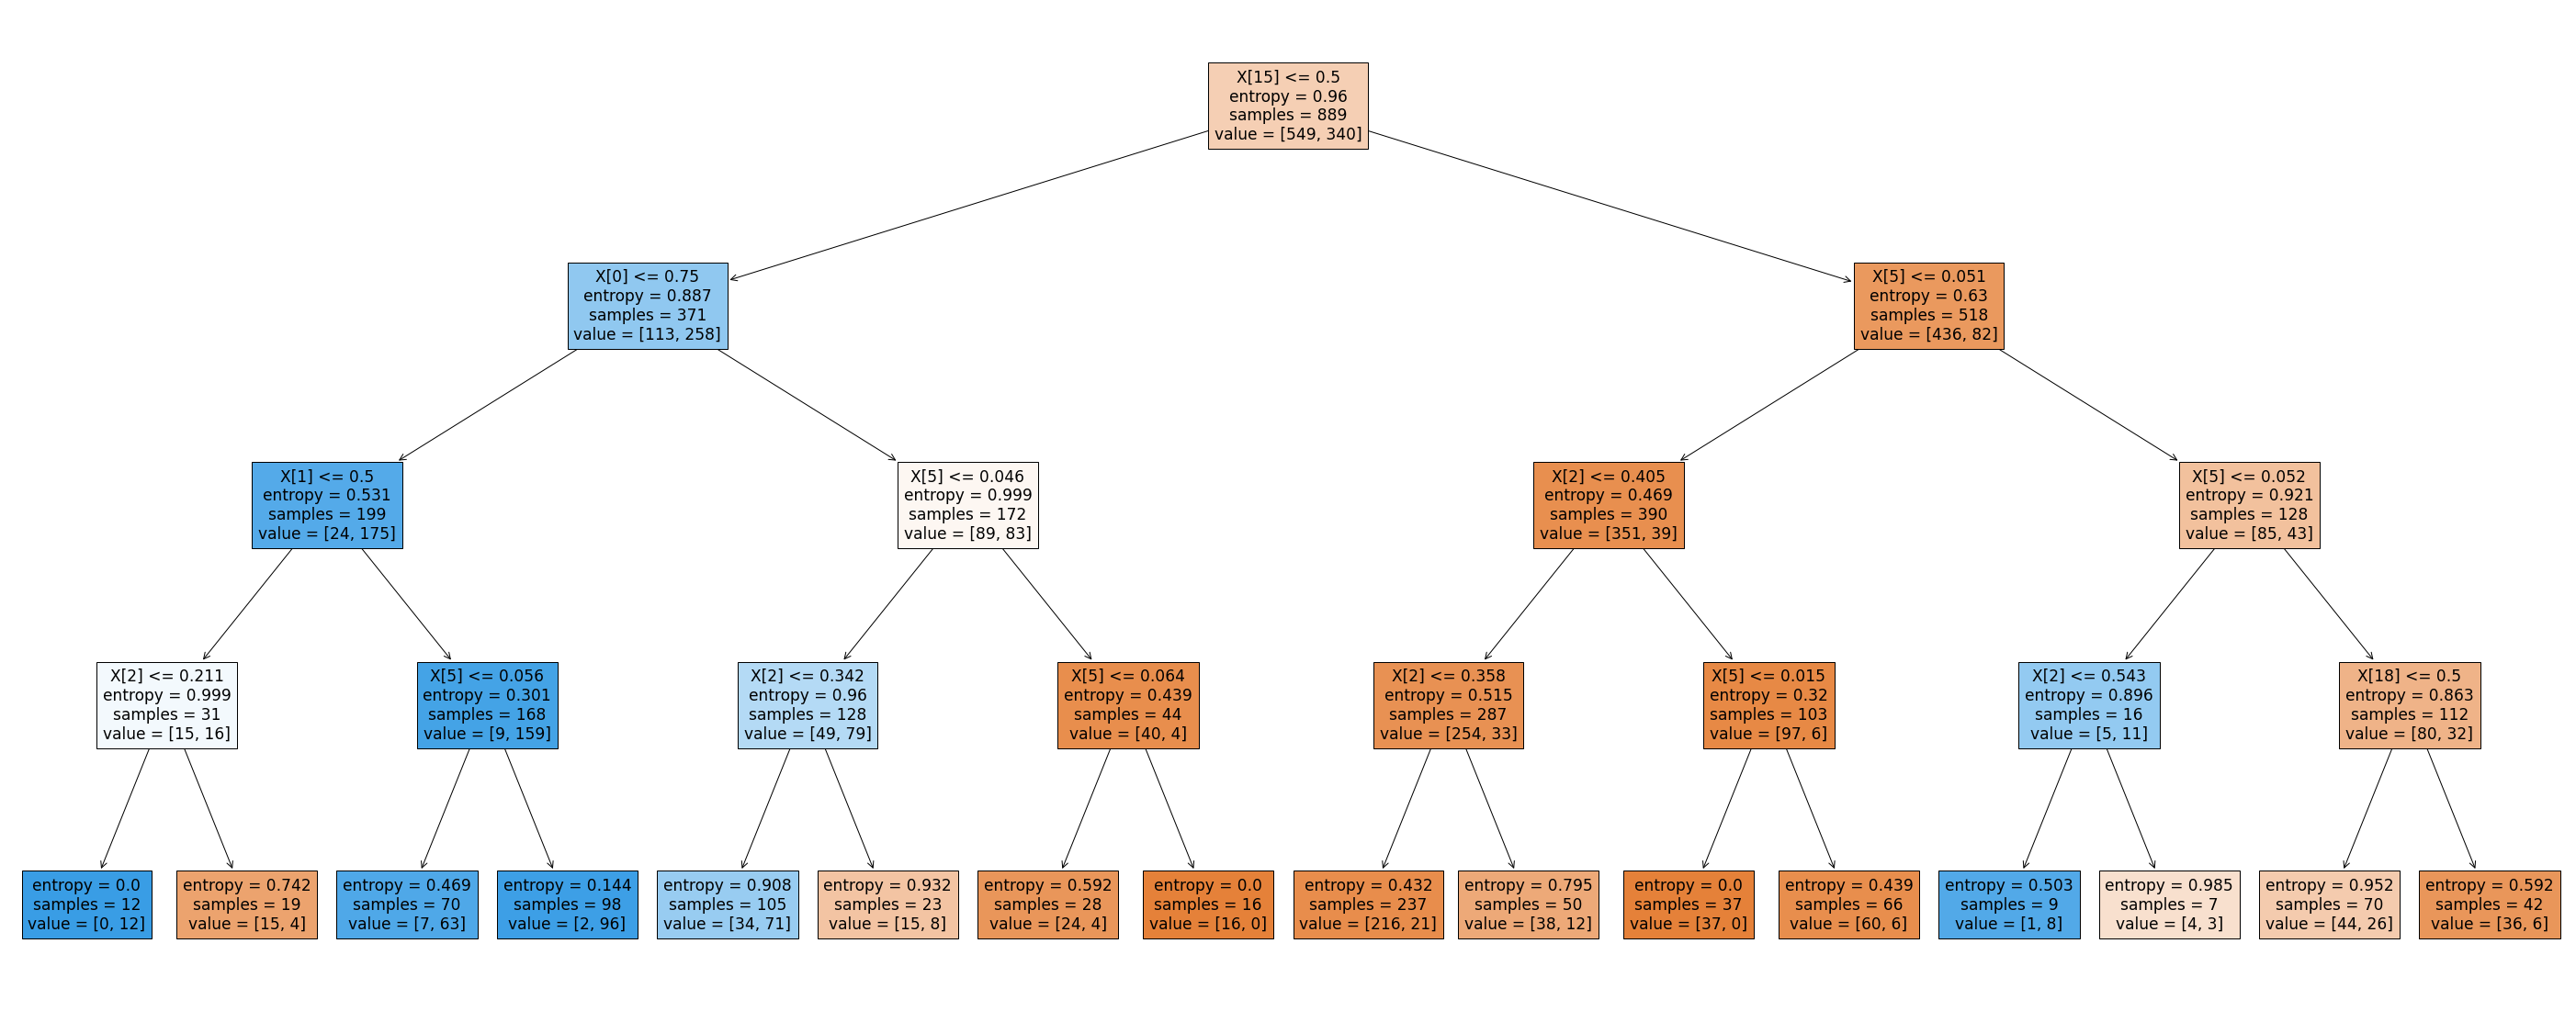

In [56]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(50,20))

plot_tree(best_tree, filled=True)